# Pymaceuticals Inc.
---

### Analysis

In this study, data from an animal study to evaluate the performance of Capomulin against SCC tumors, and compared to other treatment regimens. Some of the highlights are listed below.
- A total of 249 mice were included in the experiments, and results from one was dropped due to incomplete data. The gender distribution of mice was almost 50% to 50%. Data from a similar number of time points were collected for all treatments, from about 148 for Propriva to 230 for Capomulin. 
- Among four drug regimes of interest (Capolumin, Ramicane, Infubinol, and Ceftamin), the lowest values for final tumor volume (in mm3) were observed for mice that received treatment with Capomulin and Ramicane, with average volume of 36.7 and 36.2mm3, respectively (see boxplot in line 75). Mice treated with Infubinol and Ceftamin showed the largest final tumor volumes, with an average of 58.2 and 57.6mm3, respectively. The differences between these two pairs of treatments were statistically significant.
- In general, the tumor volume of mice treated with Capomulin tended to decrease with time, as the chart in line 38 shows. However, an initial increased was observed in the second time point, probably as the treatment built up in the mice system.
- The average tumor volume of mice treated with Capolumin displayed a high positive correlation of 0.84 with the mouase weight (see scatterplot on line 39).  
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merged=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")
# Display the data table for preview
merged.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [24]:
# Checking the number of mice.
print(len(merged["Mouse ID"].unique()))
# print(len(merged["Mouse ID"]))

249


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicates=merged.duplicated(subset=["Mouse ID","Timepoint"],keep='first')
duplicates=merged.loc[merged.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=merged[merged["Mouse ID"].isin(duplicates)==True]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean=merged[merged["Mouse ID"].isin(duplicates)==False]
merged_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Checking the number of mice in the clean DataFrame.
#merged_clean["Mouse ID"].unique()
print(len(merged_clean["Mouse ID"].unique()))

248


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# merged_clean.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=merged_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median=merged_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=merged_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev=merged_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM=merged_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Std.Dev.":stdev,"SEM":SEM})
summary_stats



,Mean,Median,Variance,Std.Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg=merged_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

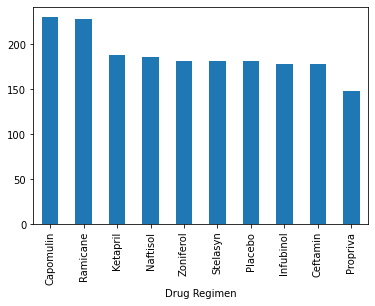

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
sum_time_point=merged_clean.groupby(["Drug Regimen"])["Timepoint"].count()
sorted=sum_time_point.sort_values(ascending=False)
#sorted
sorted.plot.bar()



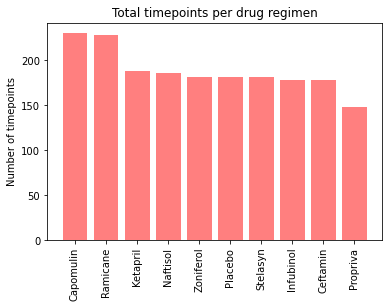

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count=merged_clean["Drug Regimen"].value_counts()
x_axis=count.index.values
y_axis=count.values
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.title("Total timepoints per drug regimen")
plt.ylabel("Number of timepoints")
plt.show()
y_axis

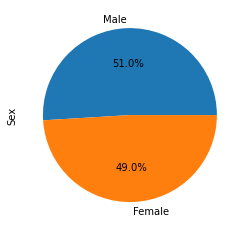

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merged_clean["Sex"].value_counts().plot.pie(y="Gender", autopct='%1.1f%%')

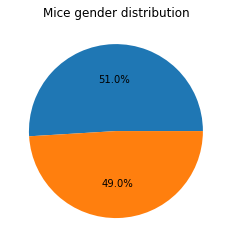

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y=merged_clean["Sex"].value_counts()
plt.pie(y, autopct='%1.1f%%')
plt.title("Mice gender distribution")
plt.show() 

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=merged_clean.groupby("Mouse ID")["Timepoint"].max()
max_timepoint=max_timepoint.reset_index()
# max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint=max_timepoint.merge(merged_clean,on=["Mouse ID","Timepoint"],how="left")
merged_timepoint
# the following was used to calculate the average final tumor volumes
# average_final_volume=merged_timepoint.groupby("Drug Regimen").mean() 
# average_final_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [71]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=merged_timepoint.loc[merged_timepoint["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bound
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]
    print(f"{drug}: {outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


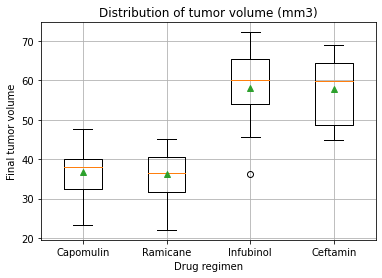

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, showmeans=True)
plt.grid()
plt.title("Distribution of tumor volume (mm3)")
plt.xticks([1,2,3,4],drug_list)
plt.ylabel("Final tumor volume")
plt.xlabel("Drug regimen")
plt.show()

## Line and Scatter Plots

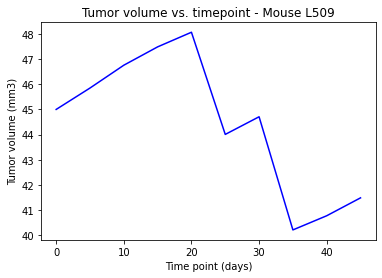

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select columns "Timepoint" and "Tumor Volume (mm3)"
x_axis=merged_clean[merged_clean["Mouse ID"]=="l509"]["Timepoint"]
y_axis=merged_clean[merged_clean["Mouse ID"]=="l509"]["Tumor Volume (mm3)"]

tumor_vol_line_chart, = plt.plot(x_axis, y_axis, color="blue", label="Capomulin" )

plt.title("Tumor volume vs. timepoint - Mouse L509")
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("Time point (days)")
plt.show()


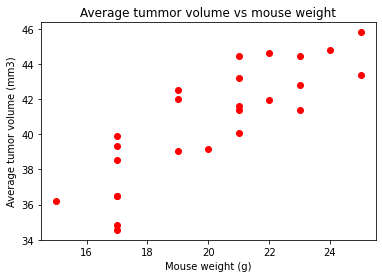

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
merged_clean_capomulin=merged_clean[merged_clean["Drug Regimen"]=="Capomulin"]#["Tumor Volume (mm3)"]#["Weight (g)"]
mouse_id=merged_clean_capomulin["Mouse ID"].unique()
# mouse_id
mouse_weight=[]
avrg_tumor_volume=[]
for mouse in mouse_id:
    avrg_tumor_volume.append(merged_clean_capomulin.loc[merged_clean_capomulin["Mouse ID"] == mouse, "Tumor Volume (mm3)"].mean())
    mouse_weight.append(merged_clean_capomulin.loc[merged_clean_capomulin["Mouse ID"] == mouse, "Weight (g)"].mean())

plt.title("Average tumor volume vs mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")

plt.scatter(mouse_weight, avrg_tumor_volume, marker="o", color="red")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The regression equation is:y = 0.95x + 21.55


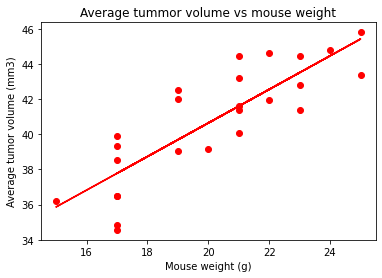

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,avrg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avrg_tumor_volume)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
print("The regression equation is:"+line_eq)

fit_curve=[]
for i in range(0,len(mouse_id)):
    fit_curve.append(mouse_weight[i]*slope+intercept)
fit_curve

plt.scatter(mouse_weight, avrg_tumor_volume, marker="o", color="red")
plt.plot(mouse_weight,fit_curve,"r-")
# plt.annotate(line_eq,(7,1),fontsize=15,color="red") #add in regression equation
plt.title("Average tummor volume vs mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.show()
